In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
 
result = []
 
Stats_url='https://www.espn.com/nba/player/gamelog/_/id/6475/klay-thompson'
html = urllib.request.urlopen(Stats_url)
 
print(html)
 
soupStats=BeautifulSoup(html,'html.parser')


In [48]:
import requests

# URL of the page to crawl
url = "https://www.espn.com/nba/player/gamelog/_/id/6475/klay-thompson"

# Define headers to mimic a legitimate browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

try:
    # Send a GET request to the URL with headers
    response = requests.get(url, headers=headers)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        print("Page retrieved successfully!")
        # Your scraping logic here
    else:
        print("Failed to retrieve the page. Status code:", response.status_code)
except requests.exceptions.RequestException as e:
    print("Failed to retrieve the page:", e)


Page retrieved successfully!


In [17]:
response

<Response [200]>

In [29]:
result = []

if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Find all tables with class "Table__table"
    table_body = soup.find_all("tbody", class_="Table__TBODY")

    # Check if any table with class "Table__table" is found
    if table_body:
        # Iterate over each table
        for table in table_body:
            # Extract table rows
            rows = []
            for row in table.find_all("tr"):
                row_data = [td.text.strip() for td in row.find_all("td")]
                rows.append(row_data)

            # Print table rows
            for row in rows:
                print(row)
                result.append(row)
            print()  # Add an empty line between tables
    else:
        print("No tables with class 'Table__table' found on the page.")


['Sat 2/10', 'vsPHX', 'W113-112', '24', '2-10', '20.0', '1-7', '14.3', '0-0', '0.0', '2', '1', '1', '1', '0', '1', '5']
['Wed 2/7', '@PHI', 'W127-104', '28', '6-12', '50.0', '4-5', '80.0', '2-2', '100.0', '3', '1', '1', '0', '1', '0', '18']
['Mon 2/5', '@BKN', 'W109-98', '30', '4-9', '44.4', '0-3', '0.0', '0-0', '0.0', '6', '3', '0', '2', '1', '1', '8']
['Sat 2/3', '@ATL', 'L141-134 OT', '36', '4-19', '21.1', '2-13', '15.4', '0-0', '0.0', '4', '2', '1', '3', '0', '1', '10']
['Fri 2/2', '@MEM', 'W121-101', '27', '6-15', '40.0', '2-9', '22.2', '0-0', '0.0', '2', '0', '1', '0', '0', '0', '14']
['february', '30.0', '5.0-13.8', '36.4', '2.0-7.5', '26.7', '0.5-0.5', '100.0', '3.8', '1.5', '0.8', '1.3', '0.5', '0.5', '12.5']

['Sat 1/27', 'vsLAL', 'L145-144 2OT', '47', '9-24', '37.5', '6-17', '35.3', '0-0', '0.0', '4', '4', '0', '2', '6', '2', '24']
['Thu 1/25', 'vsSAC', 'L134-133', '31', '5-14', '35.7', '2-7', '28.6', '4-4', '100.0', '1', '1', '1', '1', '5', '1', '16']
['Wed 1/24', 'vsATL', 

In [31]:
result[0]

['Sat 2/10',
 'vsPHX',
 'W113-112',
 '24',
 '2-10',
 '20.0',
 '1-7',
 '14.3',
 '0-0',
 '0.0',
 '2',
 '1',
 '1',
 '1',
 '0',
 '1',
 '5']

In [55]:
import requests
from bs4 import BeautifulSoup

col_names = []

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, "html.parser")

    # Find all <th> tags with class "evt-col" or with title attribute
    th_tags = soup.find_all("th", class_="evt-col") + soup.find_all("th", title=True)

    # Extract the text from each <th> tag
    th_texts = [th.text.strip() for th in th_tags]

    # Print the extracted text
    for th_text in th_texts:
        col_names.append(th_text)
else:
    print("Failed to retrieve the page.")


In [59]:
unique_values = []
[unique_values.append(x) for x in col_names if x not in unique_values]
print(unique_values)

['Date', 'OPP', 'Result', 'MIN', 'FG', 'FG%', '3PT', '3P%', 'FT', 'FT%', 'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS', 'Regular Season Stats', 'Team', 'W', 'L', 'PCT', 'GB', 'STRK']


In [62]:
unique_values = unique_values[:-7]

In [63]:
unique_values

['Date',
 'OPP',
 'Result',
 'MIN',
 'FG',
 'FG%',
 '3PT',
 '3P%',
 'FT',
 'FT%',
 'REB',
 'AST',
 'BLK',
 'STL',
 'PF',
 'TO',
 'PTS']

In [64]:
columns = unique_values

In [66]:
thompson_data = pd.DataFrame(data = result, columns = columns)

In [71]:
thompson_data.replace('None', None, inplace=True)

# Drop rows with any None values
thompson_data.dropna(inplace=True)

# Now, you can proceed with plotting or any other analysis


In [77]:
thompson_data = thompson_data[::-1]
thompson_data

,Date,OPP,Result,MIN,FG,FG%,3PT,3P%,FT,FT%,REB,AST,BLK,STL,PF,TO,PTS
62,Sat 10/7,vsLAL,W125-108,13,2-8,25.0,2-7,28.6,4-6,66.7,4,0,1,0,0,2,10
61,Fri 10/13,@LAL,W129-125,23,3-10,30.0,2-4,50.0,0-0,0.0,3,2,0,0,1,0,8
60,Sun 10/15,@SAC,W121-115 OT,17,4-9,44.4,2-3,66.7,2-2,100.0,3,0,0,0,1,1,12
59,Wed 10/18,vsSAC,W116-115,32,2-10,20.0,1-4,25.0,0-0,0.0,7,4,0,0,1,3,5
58,Fri 10/20,vsSA,L122-117,18,3-13,23.1,1-8,12.5,2-2,100.0,3,0,0,0,2,1,9
54,Tue 10/24,vsPHX,L108-104,36,6-18,33.3,3-11,27.3,0-0,0.0,7,3,1,0,3,3,15
53,Fri 10/27,@SAC,W122-114,33,7-12,58.3,2-4,50.0,2-2,100.0,3,4,0,1,4,3,18
52,Sun 10/29,@HOU,W106-95,29,7-12,58.3,5-10,50.0,0-0,0.0,4,0,1,0,3,1,19
50,Wed 11/1,vsSAC,W102-101,29,6-15,40.0,1-4,25.0,1-1,100.0,2,2,3,0,3,2,14
48,Fri 11/3,@OKC,W141-139,33,6-10,60.0,4-6,66.7,2-2,100.0,3,1,0,0,4,1,18


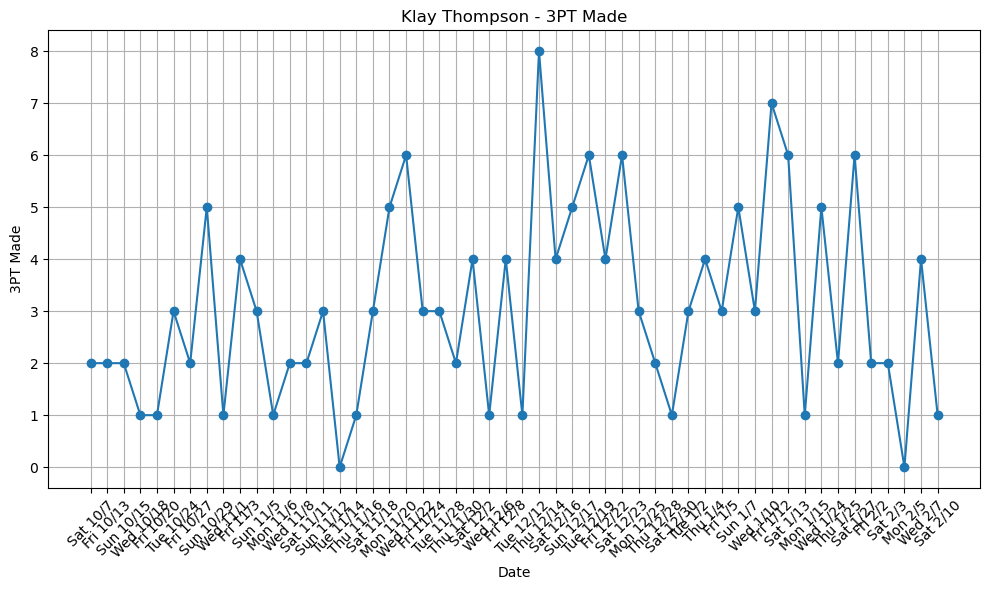

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming thompson_data is your DataFrame containing the data
# Extracting the 'Date' and '3PT' columns
dates = thompson_data['Date']
three_pointers = thompson_data['3PT']
three_pointers = three_pointers.apply(lambda x: int(x[0]))

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(dates, three_pointers, marker='o', linestyle='-')
plt.title('Klay Thompson - 3PT Made')
plt.xlabel('Date')
plt.ylabel('3PT Made')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


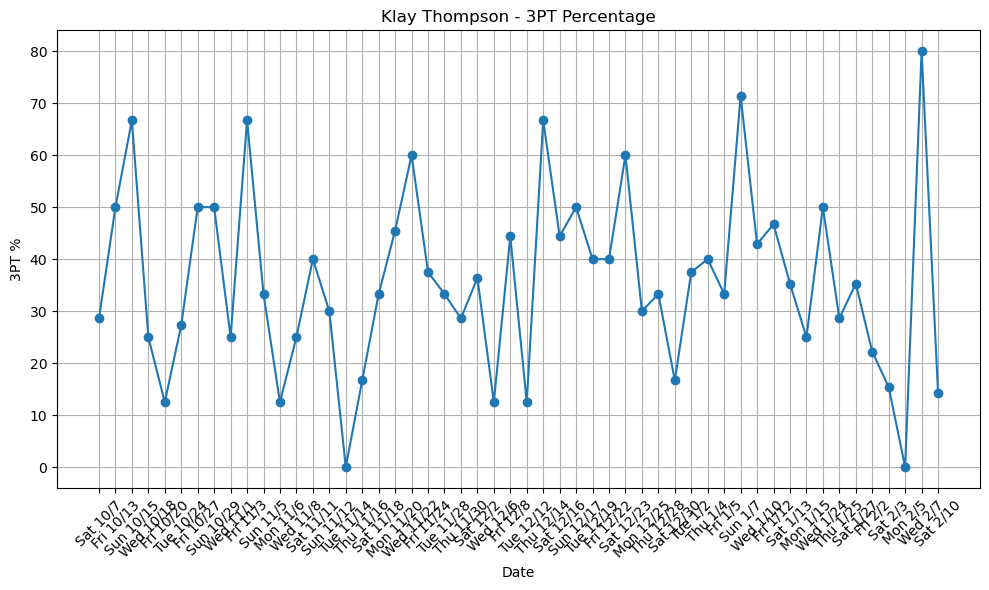

In [80]:
dates = thompson_data['Date']
three_pointers = thompson_data['3P%']
three_pointers = three_pointers.apply(lambda x: float(x))

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(dates, three_pointers, marker='o', linestyle='-')
plt.title('Klay Thompson - 3PT Percentage')
plt.xlabel('Date')
plt.ylabel('3PT %')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()
